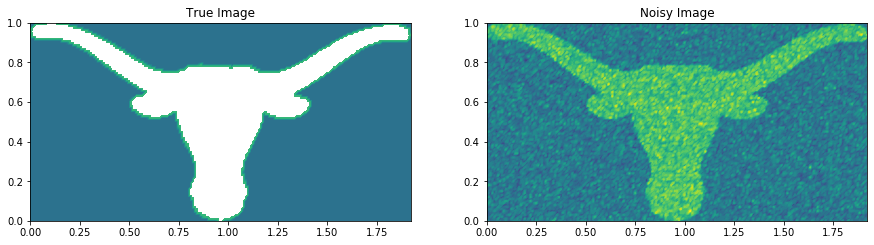

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from dolfin import *
import math
import numpy as np
import logging
from unconstrainedMinimization import InexactNewtonCG

logging.getLogger('FFC').setLevel(logging.WARNING)
logging.getLogger('UFL').setLevel(logging.WARNING)
set_log_active(False)


# Set the level of noise:
noise_std_dev = .3

# Load the image from file
data = np.loadtxt('image.dat', delimiter=',')
np.random.seed(seed=1)

noise = noise_std_dev*np.random.randn(data.shape[0], data.shape[1])
Lx = float(data.shape[1])/float(data.shape[0])
Ly = 1.

mesh = RectangleMesh(Point(0,0),Point(Lx,Ly), 200, 100)
V = FunctionSpace(mesh, "Lagrange",1)

# Generate the true image (u_true) and the noisy data (u_0)
class Image(UserExpression):
    def __init__(self, Lx, Ly, data, **kwargs):
        super().__init__(kwargs)
        self.data = data
        self.hx = Lx/float(data.shape[1]-1)
        self.hy = Ly/float(data.shape[0]-1)
        
    def eval(self, values, x):
        j = int(math.floor(x[0]/self.hx))
        i = int(math.floor(x[1]/self.hy))
        values[0] = self.data[i,j]
        
    def value_shape(self):
        return ()

trueImage  = Image(Lx, Ly, data, element=V.ufl_element())
noisyImage = Image(Lx, Ly, data+noise, element=V.ufl_element())

u_true  = interpolate(trueImage, V)
u_0     = interpolate(noisyImage, V)

vmin = np.min(u_0.vector().get_local())
vmax = np.max(u_0.vector().get_local())

plt.figure(figsize=[15,15])
plt.subplot(1,2,1)
plot(u_true, title="True Image", vmin=vmin, vmax = vmax)
plt.subplot(1,2,2)
plot(u_0, title="Noisy Image", vmin=vmin, vmax = vmax)
plt.show()

Copyright (c) 2016, The University of Texas at Austin & University of California, Merced.

All Rights reserved.
See file COPYRIGHT for details.

This file is part of the hIPPYlib library. For more information and source code availability see https://hippylib.github.io.

hIPPYlib is free software; you can redistribute it and/or modify it under the terms of the GNU General Public License (as published by the Free Software Foundation) version 2.0 dated June 1991.